In [1]:
import pandas as pd
import requests
import io
import chardet
import matplotlib.pyplot as plt

In [2]:
players_url = "https://raw.githubusercontent.com/sjcasey21/linear-relationships/master/datasets/players-seasons/Players.csv"
players_df = pd.read_csv(players_url, names=['player', 'height'])

scores_url = "https://raw.githubusercontent.com/sjcasey21/linear-relationships/master/datasets/players-seasons/Seasons_Stats.csv"
scores_df = pd.read_csv(scores_url, names=['player', 'score'])
scores_df = scores_df.drop_duplicates('player', keep='last')

In [3]:
df = pd.merge(players_df, scores_df, how='inner')

In [4]:
df_filtered = pd.DataFrame([], columns=['player', 'height', 'score'])

for group, frame in df.groupby('height'):
    players = frame.sort_values(by='score', ascending=False).head(2)
    if len(players) < 2:
        continue
    
    
    df_filtered = df_filtered.append(players)
df_new = df_filtered.sort_values(by='height').reset_index()

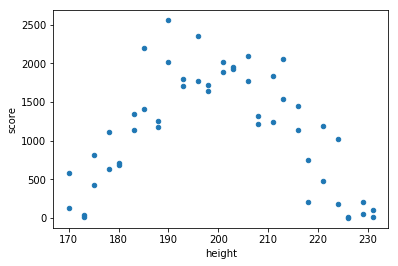

In [5]:
df_new.plot(kind='scatter', x='height', y='score')

In [10]:
sample = df_new[df_new['height'] < 200]

In [11]:
sample.to_csv('../out/basketball-height.csv', index=False)